In [1]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui (mac not supported)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-853.0..767.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-763.0..644.0].


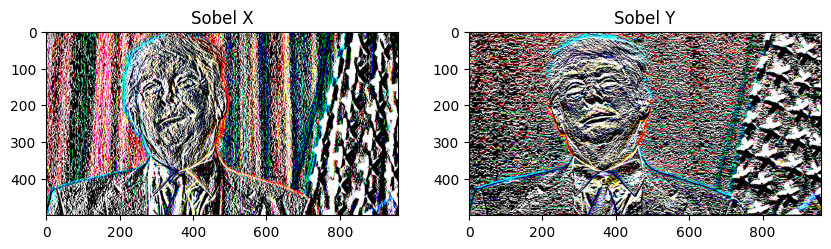

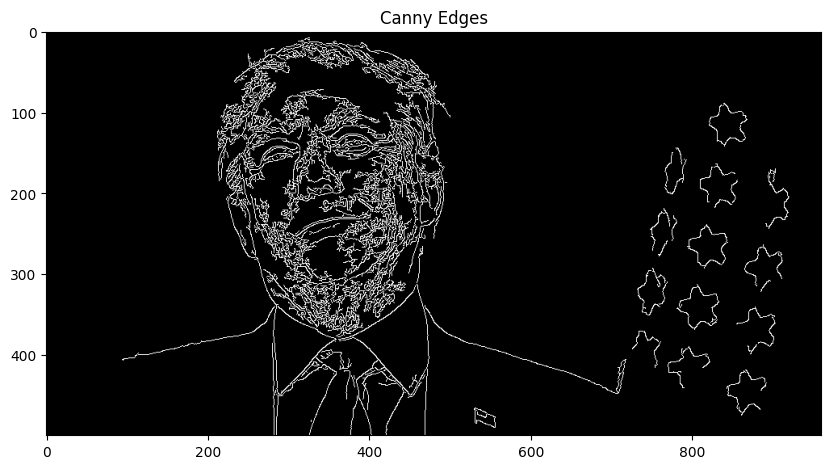

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.1397711619794912..3.141592653589793].


Text(0.5, 1.0, 'Gradient Direction')

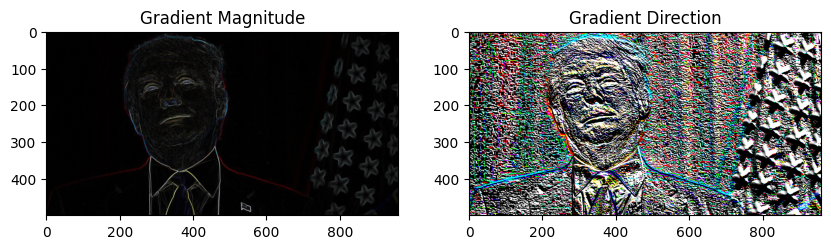

In [10]:
image = cv2.imread('../Images/Trump.jpg')

# Use Sobel to find horizontal and vertical gradients
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

# Show the gradients
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(sobelX, cmap='gray')
plt.title('Sobel X')
plt.subplot(1, 2, 2)
plt.imshow(sobelY, cmap='gray')
plt.title('Sobel Y')
plt.show()

# Use Canny to create edge mask (255 for edges 0 for nonedges)
edges = cv2.Canny(image, 0, 255)

# Show the edges
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.show()


# Gradient magnitude and direction
gradientMagnitude = np.sqrt(sobelX**2 + sobelY**2)

# Normalize the gradient magnitude
gradientMagnitude = cv2.normalize(gradientMagnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Calculate the gradient direction
gradientDirection = np.arctan2(sobelY, sobelX)

# Show the gradient magnitude and direction
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(gradientMagnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.subplot(1, 2, 2)
plt.imshow(gradientDirection, cmap='gray')
plt.title('Gradient Direction')



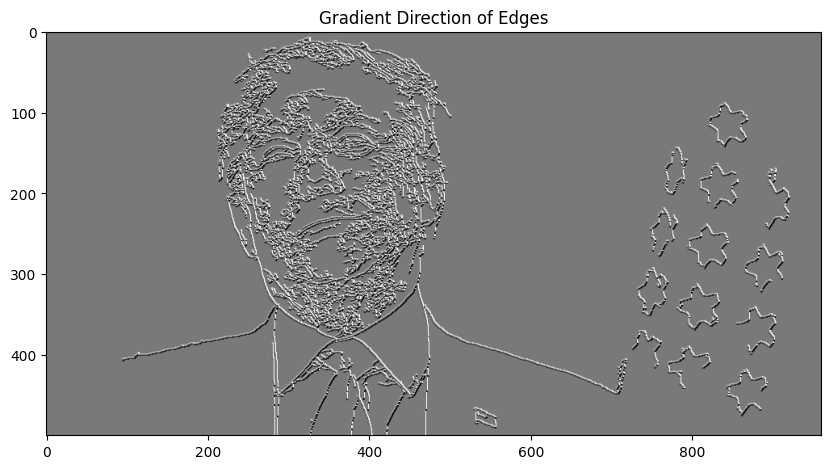

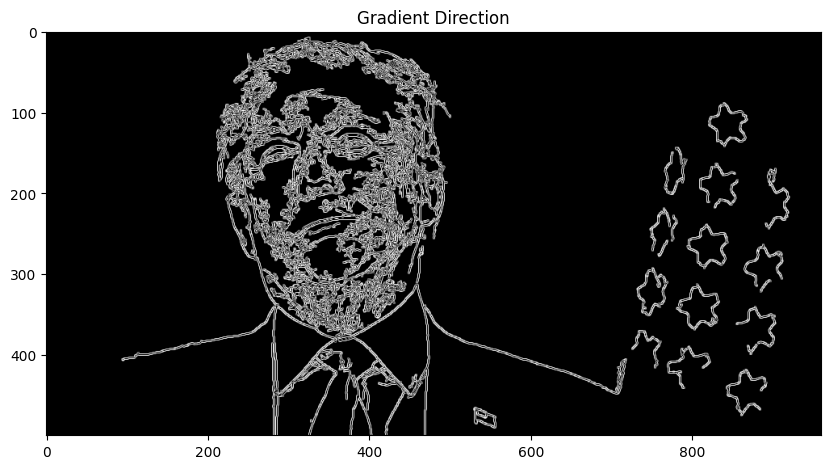

In [12]:
edges = cv2.Canny(image, 0, 255)

# Get the gradient direction of edges
sobelX = cv2.Sobel(edges, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(edges, cv2.CV_64F, 0, 1)

# Calculate the gradient direction
gradientDirection = np.arctan2(sobelY, sobelX)

# Show the gradient direction of edges
plt.figure(figsize=(10, 10))
plt.imshow(gradientDirection, cmap='gray')
plt.title('Gradient Direction of Edges')
plt.show()



# Calculate the gradient magnitude
gradientMagnitude = np.sqrt(sobelX**2 + sobelY**2)

# Normalize the gradient magnitude
gradientMagnitude = cv2.normalize(gradientMagnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


# Show the gradient direction
plt.figure(figsize=(10, 10))
plt.imshow(gradientMagnitude, cmap='gray')
plt.title('Gradient Direction')

plt.show()

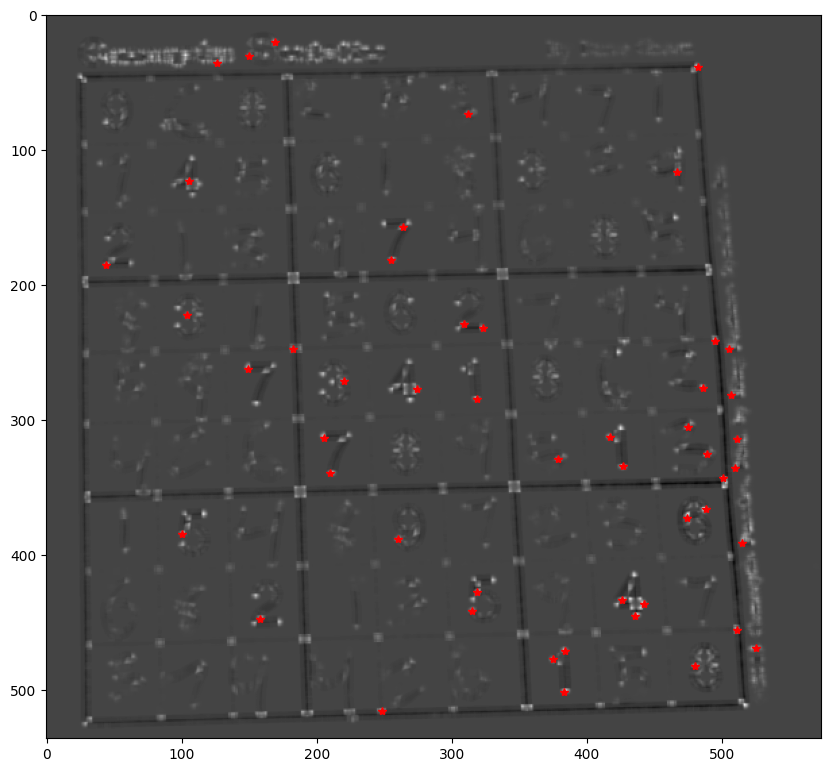

In [18]:
sudoku = cv2.imread('../Images/sudoku.jpg')

sudoku = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)

# Harris corner detection
corners = cv2.cornerHarris(sudoku, 5, 3, 0.04)

# Shi Tomasi corner detection
corners2 = cv2.goodFeaturesToTrack(sudoku, 50, 0.01, 10)


# Show the corners and map Shi Tomasi corners
plt.figure(figsize=(10, 10))
plt.imshow(corners, cmap='gray')

for i in range(corners2.shape[0]):
    x, y = corners2[i, 0, :][:2].astype(int)
    plt.plot(x, y, 'r*')

plt.show()

Text(0.5, 1.0, 'Contours')

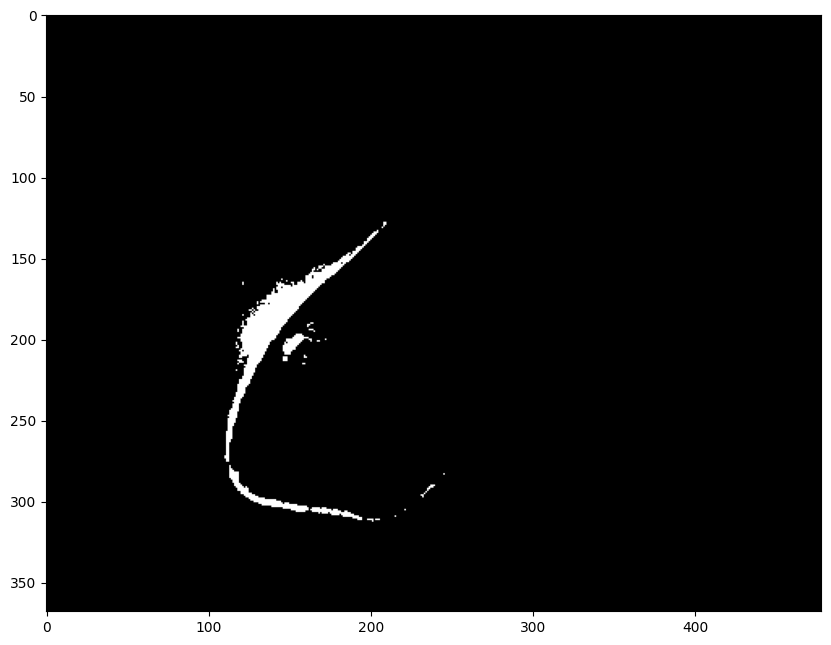

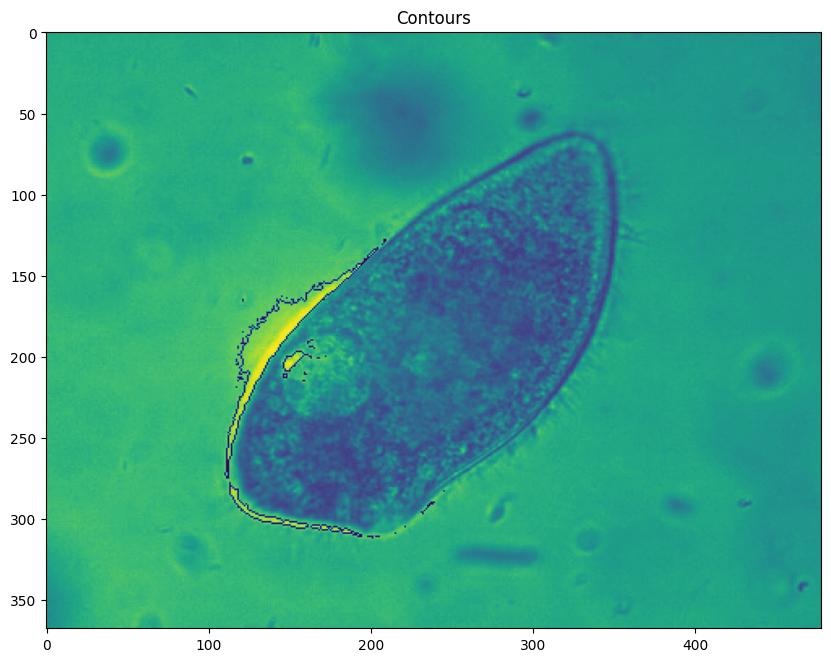

In [52]:
micro = cv2.imread('../Images/micro.jpg')


micro = cv2.cvtColor(micro, cv2.COLOR_BGR2GRAY)

# Get binary mask of the image
_, mask = cv2.threshold(micro, 190, 255, cv2.THRESH_BINARY)

# Show the mask
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')


# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw the contours
cv2.drawContours(micro, contours, -1, (0, 255, 0), 1)

# Show the contours
plt.figure(figsize=(10, 10))
plt.imshow(micro)
plt.title('Contours')


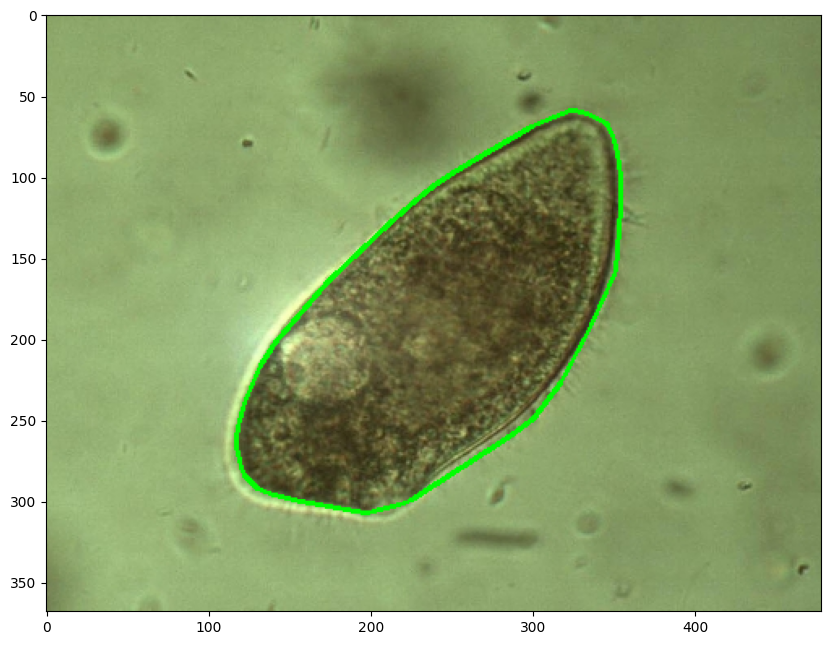

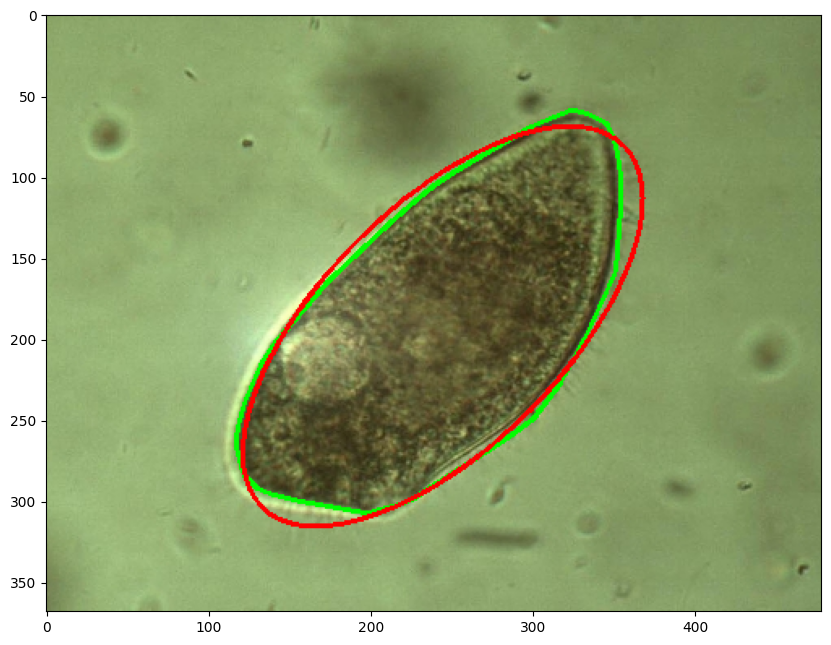

In [60]:
micro = cv2.imread('../Images/Micro.jpg')

# Convert to grayscale and apply thresholding (Otsu's method)
gray_micro = cv2.cvtColor(micro, cv2.COLOR_BGR2GRAY)
_, thresh_micro = cv2.threshold(gray_micro, 0, 255, 
cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours of the cells
contours, _ = cv2.findContours(thresh_micro, cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_NONE)

# convexHull
max_contour = max(contours, key=cv2.contourArea)
hull = cv2.convexHull(max_contour)

# Draw the convex hull
cv2.drawContours(micro, [hull], -1, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(micro, cv2.COLOR_BGR2RGB))
plt.show()


# Bounding oval of the convex hull
ellipse = cv2.fitEllipse(hull)

# Draw the ellipse
cv2.ellipse(micro, ellipse, (0, 0, 255), 2)

# Display the result
plt.figure(figsize=(10, 10))

plt.imshow(cv2.cvtColor(micro, cv2.COLOR_BGR2RGB))

plt.show()